In [3]:
import pickle, os
import sys
sys.path.insert(0, "/home/adriano/projeto_mestrado/modules/")

import geopandas as gpd
import background_generation as backgen

root_dir ="/home/adriano/projeto_mestrado/modules"

img_dir = root_dir + '/Imagens/vessel_data/images'
#Varrendo o diretório
filenames = []
for filename in os.listdir(img_dir):    
  filenames.append(filename.split('.')[0])
filenames = filenames[:20]

#Lendo o pickle e gerando o vessel_map
idx = 1
pickle_dir = f'{root_dir}/Vessel_Models_pickle'
path = (pickle_dir + f'/{filenames[idx]}_savedata1.pickle')
arquivo = pickle.load(open(path, 'rb'))
vessel_map = arquivo['vessel_model'].vessel_map
mapa_original = vessel_map.mapped_values

#Lendo o Json
#arquivo = '/content/drive/MyDrive/Mestrado em Ciência da Computação/Artificial Lines/arquivo_quatro_pontos.json'
arquivo = f'{root_dir}/Artificial_Lines/teste_31_05.json'
#arquivo = '/content/drive/MyDrive/Mestrado em Ciência da Computação/Artificial Lines/teste2_31_05.json'
#arquivo = '/content/drive/MyDrive/Mestrado em Ciência da Computação/Artificial Lines/teste.json'

medial_path = backgen.retorna_paths(arquivo)
caminhos_transladados_interpolado = backgen.retorna_caminhos_transladados(medial_path[0], 2)

linha_central,linha_offset_esquerda,linha_offset_direita, maior_tamanho = backgen.retorna_linhas_offset_posicao_tamanho(mapa_original,caminhos_transladados_interpolado[0])

gp4 = gpd.GeoSeries([linha_offset_esquerda, linha_central, linha_offset_direita])
gp4.plot(cmap="tab10")


ModuleNotFoundError: No module named 'Slice_mapper'

**Plotando os pontos**

In [ ]:
pontos_x = caminhos_transladados_interpolado[0][:,0]
pontos_y = caminhos_transladados_interpolado[0][:,1]
backgen.plotar_pontos(pontos_x, pontos_y, 'Caminhos transladados Interpolados' )

NameError: name 'caminhos_transladados_interpolado' is not defined

 ***Exibição do mapa normal***


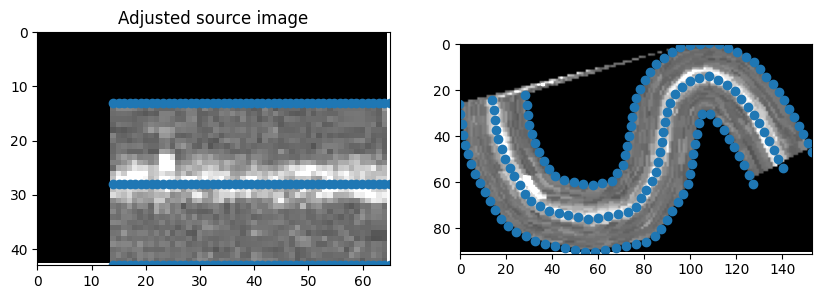

In [ ]:
import numpy as np

mapa = np.array(mapa_original)

rows, cols = mapa.shape[0], mapa.shape[1]

src_cols = np.linspace(0, cols, maior_tamanho)
src_rows = np.linspace(-1, rows, 3)
src_cols, src_rows = np.meshgrid(src_cols,src_rows)
src = np.dstack([src_cols.flat, src_rows.flat])[0]

dst_array_np = backgen.retorna_dst_array_np(linha_central,linha_offset_esquerda,linha_offset_direita, maior_tamanho)

img_proper, img_out, new_src, new_dst = backgen.transform_v2(src, dst_array_np, mapa)
backgen.plot(img_proper, img_out, new_src, new_dst, 60)

**Lendo o pickle e gerando o vessel_map e a imagem binária sem artefatos**

In [ ]:
#import cv2
from PIL import Image
import matplotlib.pyplot as plt

img = np.array(Image.open(img_dir + f'{filenames[idx]}.tiff'))

path = (pickle_dir + f'{filenames[idx]}_savedata1.pickle')

arquivo = pickle.load(open(path, 'rb'))

vessel_map = arquivo['vessel_model'].vessel_map

mapa_original = vessel_map.mapped_values

#cv2.imwrite('mapa_original.png', mapa_original)

imagem_binaria_original = vessel_map.mapped_mask_values

imagem_binaria_sem_artefatos = backgen.retornar_imagem_binaria_sem_artefatos(vessel_map, imagem_binaria_original )

plt.figure(figsize=[10, 8])
plt.title("Imagem binária sem artefatos")
plt.imshow(imagem_binaria_sem_artefatos, 'gray', vmin=0, vmax=1)
plt.plot()

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\adria\\Documents\\Mestrado\\texture_codes\\modules\\Imagens\\vessel_data\\imagesExperiment #1 (adults set #1)_20x_batch1 - Superfical layers@40-Image 2-20X.tiff'